# Welcome to Jupyter!

In [1]:
!pip install pandas_datareader
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 107 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 4.1 MB/s eta 0:00:01     |██▏                             | 378 kB 4.1 MB/s eta 0:00:02     |███                             | 501 kB 4.1 MB/s eta 0:00:02     |██████████████████████████▊     | 4.6 MB 4.1 MB/s eta 0:00:01�██▍   | 4.9 MB 4.1 MB/s eta 0:00:01     |███████████████████████████████▍| 5.4 MB 4.1 MB/s eta 0:00:01


In [2]:
DAX=web.DataReader("^GDAXI", data_source="yahoo",start="2004-09-30",end="2014-09-30")


In [3]:
DAX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-09-30,3950.659912,3887.830078,3934.590088,3892.899902,88766700.0,3892.899902
2004-10-01,3996.110107,3895.149902,3895.149902,3994.959961,111214400.0,3994.959961
2004-10-04,4059.270020,4005.639893,4005.639893,4033.280029,102621700.0,4033.280029
2004-10-05,4078.500000,4023.750000,4034.300049,4048.709961,110199700.0,4048.709961
2004-10-06,4062.189941,4030.739990,4046.300049,4049.659912,97875300.0,4049.659912
...,...,...,...,...,...,...
2014-09-24,9669.450195,9534.769531,9598.769531,9661.969727,85850600.0,9661.969727
2014-09-25,9718.110352,9482.540039,9644.360352,9510.009766,97697000.0,9510.009766
2014-09-26,9545.339844,9454.879883,9500.549805,9490.549805,83499600.0,9490.549805


In [4]:
DAX["Returns"]=np.log(DAX["Adj Close"]/DAX["Adj Close"].shift(1))


In [5]:
DAX

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2004-09-30,3950.659912,3887.830078,3934.590088,3892.899902,88766700.0,3892.899902,NaN
2004-10-01,3996.110107,3895.149902,3895.149902,3994.959961,111214400.0,3994.959961,0.025879
2004-10-04,4059.270020,4005.639893,4005.639893,4033.280029,102621700.0,4033.280029,0.009546
2004-10-05,4078.500000,4023.750000,4034.300049,4048.709961,110199700.0,4048.709961,0.003818
2004-10-06,4062.189941,4030.739990,4046.300049,4049.659912,97875300.0,4049.659912,0.000235
...,...,...,...,...,...,...,...
2014-09-24,9669.450195,9534.769531,9598.769531,9661.969727,85850600.0,9661.969727,0.006952
2014-09-25,9718.110352,9482.540039,9644.360352,9510.009766,97697000.0,9510.009766,-0.015853
2014-09-26,9545.339844,9454.879883,9500.549805,9490.549805,83499600.0,9490.549805,-0.002048


In [6]:
!pip install statsmodels
import statsmodels.api as sm

     |████████████████████████████████| 9.5 MB 2.9 MB/s eta 0:00:01     |▉                               | 245 kB 2.9 MB/s eta 0:00:04     |█████████████████████▋          | 6.4 MB 2.9 MB/s eta 0:00:02
     |████████████████████████████████| 231 kB 32.6 MB/s eta 0:00:01


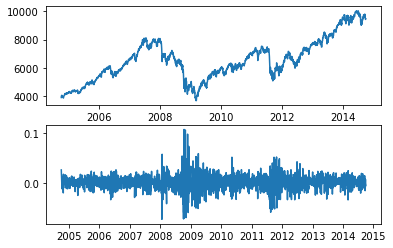

In [7]:
plt.subplot(211)
plt.plot(DAX["Adj Close"])
plt.subplot(212)
plt.plot(DAX["Returns"])

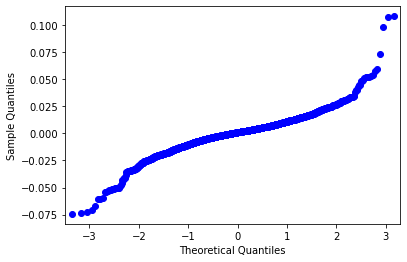

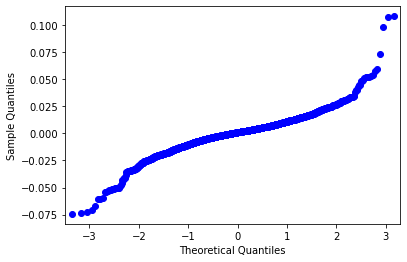

In [8]:
sm.qqplot(DAX["Returns"])

In [9]:
import scipy.stats as scs

In [10]:
sta=scs.describe(DAX["Returns"][1:])

In [11]:
DAX["Returns"][1:]

Date
2004-10-01    0.025879
2004-10-04    0.009546
2004-10-05    0.003818
2004-10-06    0.000235
2004-10-07   -0.001557
                ...   
2014-09-24    0.006952
2014-09-25   -0.015853
2014-09-26   -0.002048
2014-09-29   -0.007153
2014-09-30    0.005439
Name: Returns, Length: 2544, dtype: float64

In [12]:
scs.skewtest(DAX["Returns"][1:])

SkewtestResult(statistic=0.3062384756256759, pvalue=0.7594230794081114)

In [13]:
DAX["rea_var"]=252*np.cumsum(DAX["Returns"]**2)/np.arange(len(DAX))

In [17]:
a=[1,2,3]
np.cumsum(a)

array([1, 3, 6])

In [18]:
DAX["rea_var"]

Date
2004-09-30         NaN
2004-10-01    0.168773
2004-10-04    0.095869
2004-10-05    0.065138
2004-10-06    0.048857
                ...   
2014-09-24    0.048095
2014-09-25    0.048101
2014-09-26    0.048083
2014-09-29    0.048069
2014-09-30    0.048053
Name: rea_var, Length: 2545, dtype: float64

In [19]:
np.arange(len(DAX))

array([   0,    1,    2, ..., 2542, 2543, 2544])

In [20]:
np.cumsum(DAX["Returns"])

Date
2004-09-30         NaN
2004-10-01    0.025879
2004-10-04    0.035426
2004-10-05    0.039244
2004-10-06    0.039479
                ...   
2014-09-24    0.909043
2014-09-25    0.893191
2014-09-26    0.891142
2014-09-29    0.883990
2014-09-30    0.889428
Name: Returns, Length: 2545, dtype: float64

In [21]:
np.cumsum(DAX["Returns"]**2)

Date
2004-09-30         NaN
2004-10-01    0.000670
2004-10-04    0.000761
2004-10-05    0.000775
2004-10-06    0.000776
                ...   
2014-09-24    0.484769
2014-09-25    0.485020
2014-09-26    0.485025
2014-09-29    0.485076
2014-09-30    0.485105
Name: Returns, Length: 2545, dtype: float64

In [22]:
11+0

11

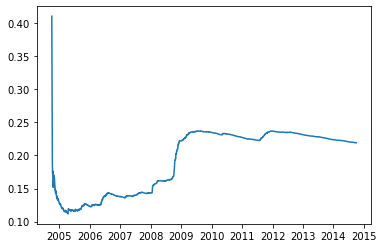

In [26]:
DAX["rea_vol"]=np.sqrt(DAX["rea_var"])
plt.plot(DAX["rea_vol"])

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook